# 311 Case Data EDA
#### Source: https://support.datasf.org/help/311-case-data-faq

In [145]:
# Load pandas
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv(r'C:\Users\diana\Downloads\Subset of 311_Cases.csv')

# Show dataframe
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,341548,12/30/2008 2:20:55 PM,12/31/2008 6:07:17 AM,12/31/2008 6:07:17 AM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,Intersection of 26TH AVE and CALIFORNIA ST,2.0,Outer Richmond,RICHMOND,37.78383,-122.4861,"(37.7838335389605, -122.486088818895)",Phone,NaN
1,259969,08/05/2008 12:59:20 PM,12/18/2010 5:09:23 PM,12/18/2010 5:09:23 PM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,Other,"4220 CESAR CHAVEZ ST, SAN FRANCISCO, CA, 94131",8.0,Noe Valley,MISSION,37.74730,-122.4344,"(37.747303426286, -122.434433353631)",Phone,NaN
2,341216,12/30/2008 10:09:29 AM,12/30/2008 11:22:48 AM,12/30/2008 11:22:48 AM,Closed,NaN,DPW - Bureau of Street Environmental Services - G,General Request - PUBLIC WORKS,customer_callback,bses - customer_callback,Intersection of 42ND AVE and VICENTE ST,4.0,Parkside,TARAVAL,37.73824,-122.5001,"(37.7382393911063, -122.500057739731)",Phone,NaN
3,340515,12/29/2008 12:26:49 PM,12/30/2008 6:07:11 AM,12/30/2008 6:07:11 AM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Mattress,Intersection of LISBON ST and RUSSIA AVE,11.0,Excelsior,INGLESIDE,37.72044,-122.4348,"(37.7204448592181, -122.434784793444)",Phone,NaN
4,271116,08/26/2008 12:22:21 PM,06/26/2010 6:16:56 PM,06/26/2010 6:16:56 PM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,Other,"1395 GOLDEN GATE AVE, SAN FRANCISCO, CA, 94115",5.0,Western Addition,NORTHERN,37.77926,-122.4333,"(37.779262971669, -122.433324446066)",Phone,NaN


In [146]:
# test caseID for uniqueness
pd.Series(df["CaseID"]).is_unique

True

In [147]:
# check out the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseID               30000 non-null  int64  
 1   Opened               30000 non-null  object 
 2   Closed               28966 non-null  object 
 3   Updated              30000 non-null  object 
 4   Status               30000 non-null  object 
 5   Status Notes         21659 non-null  object 
 6   Responsible Agency   30000 non-null  object 
 7   Category             30000 non-null  object 
 8   Request Type         30000 non-null  object 
 9   Request Details      29489 non-null  object 
 10  Address              30000 non-null  object 
 11  Supervisor District  26613 non-null  float64
 12  Neighborhood         25836 non-null  object 
 13  Police District      26590 non-null  object 
 14  Latitude             30000 non-null  float64
 15  Longitude            30000 non-null 

In [148]:
# Let's convert data types
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])
df['Supervisor District'] = df['Supervisor District'].astype(str)
df['CaseID'] = df['CaseID'].astype(str)

In [149]:
df["Status"].value_counts()
# Looks Good!

Closed    28966
Open       1034
Name: Status, dtype: int64

In [150]:
#Let's make a time to closed
t = df['Opened'].max()
df['days_to_close'] = (df['Closed'].mask(pd.isnull, t) - df['Opened']).dt.days
df = df.drop(df[df.days_to_close < 0].index)

In [151]:
df["Responsible Agency"].value_counts()
# Looks like many agencies

DPW Ops Queue                                    11406
Recology_Abandoned                                3163
DPT Abandoned Vehicles Work Queue                 1874
MUNI Work Queue                                   1442
DPW BSM Queue                                     1056
                                                 ...  
PUC - Water Waste - Customer Service Queue           1
Port Authority - Temporary Sign Request Queue        1
Elections - G                                        1
Assessor - Real Property - C Volumes                 1
DBI Plumbing Inspection Queue                        1
Name: Responsible Agency, Length: 228, dtype: int64

In [152]:
df["Category"].value_counts()
# 75 categories, maybe we can reduce them by removing anything after the DASH

Street and Sidewalk Cleaning              8019
Graffiti                                  4280
MUNI Feedback                             1885
Abandoned Vehicle                         1862
Homeless Concerns                         1511
                                          ... 
General Request - MOD                        1
General Request - FILM COMMISSION            1
General Request - SMALL BUSINESS             1
General Request - AGING ADULT SERVICES       1
General Request - HSH                        1
Name: Category, Length: 75, dtype: int64

In [153]:
df['Category_Clean'] = df['Category'].str.split(' -').str[0]
df["Category_Clean"].value_counts()
# Down to 29 categories. Looks Better!

Street and Sidewalk Cleaning    8019
Graffiti                        4280
General Request                 2813
MUNI Feedback                   1885
Abandoned Vehicle               1862
Homeless Concerns               1511
Encampments                     1321
Damaged Property                 937
Sewer Issues                     740
SFHA Requests                    653
Tree Maintenance                 642
Streetlights                     638
Street Defects                   589
Litter Receptacles               578
Sign Repair                      469
Rec and Park Requests            423
Illegal Postings                 395
Sidewalk or Curb                 345
Temporary Sign Request           281
Blocked Street or SideWalk       251
Parking Enforcement              199
311 External Request             180
Color Curb                       131
Noise Report                     125
Residential Building Request     116
Construction Zone Permits        116
Catch Basin Maintenance           56
K

In [154]:
df["Request Type"].value_counts()
# same here

Bulky Items                                               3687
General Cleaning                                          3369
request_for_service                                       1197
Human Waste                                               1084
Encampment Reports                                        1069
                                                          ... 
Construction Zone Tow-away Permits for E&F Demolition        1
Temporary Sign Request for Film_Projects                     1
Temporary Sign Request for City_Sponsored_Celebrations       1
Illegal Posting - Multiple_Postings                          1
Abandoned Vehicle - DeliveryTruck                            1
Name: Request Type, Length: 352, dtype: int64

In [155]:
df["Supervisor District"].value_counts()
# convert this to a string

9.0     3979
6.0     3792
nan     3382
5.0     2930
3.0     2910
10.0    2849
8.0     2791
1.0     1762
11.0    1433
2.0     1337
7.0     1285
4.0     1134
-1.0       7
0.0        7
Name: Supervisor District, dtype: int64

In [156]:
df["Police District"].value_counts()
# Looks Good!

MISSION       4799
INGLESIDE     3078
NORTHERN      2895
CENTRAL       2799
TARAVAL       2506
SOUTHERN      2438
BAYVIEW       2391
RICHMOND      2041
PARK          2002
TENDERLOIN    1244
Name: Police District, dtype: int64

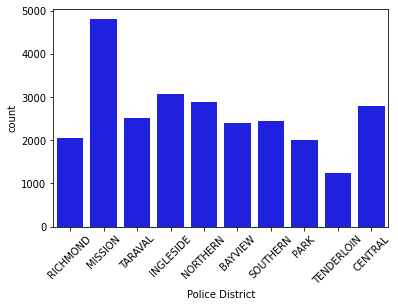

In [157]:
import seaborn as sns
chart = sns.countplot(data = df, x = df["Police District"], color = 'Blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
None

In [158]:
df["Source"].value_counts()
# Looks Good!

Phone                15443
Mobile/Open311        8144
Web                   4654
Integrated Agency     1001
Twitter                291
Other Department        55
Email                    9
Mail                     1
Name: Source, dtype: int64

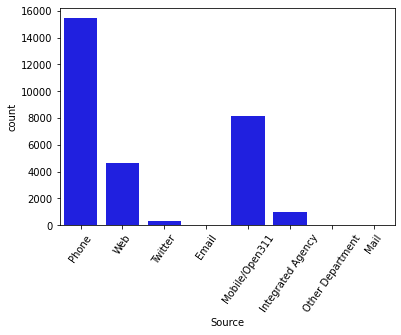

In [159]:
import seaborn as sns
chart = sns.countplot(data = df, x = df["Source"], color = 'Blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=55)
None

In [160]:
# town / # of each category clean 
df_corr = df.groupby(['Category_Clean', 'Police District'])['CaseID'].count().reset_index(name='count')


In [161]:
df_corr.head()

,Category_Clean,Police District,count
0,311 External Request,BAYVIEW,15
1,311 External Request,CENTRAL,18
2,311 External Request,INGLESIDE,31
3,311 External Request,MISSION,36
4,311 External Request,NORTHERN,23


In [162]:
pivot = df_corr.pivot_table(index = "Police District",columns = "Category_Clean", values = "count")

In [163]:
pivot.head(25)

Category_Clean,311 External Request,Abandoned Vehicle,Blocked Street or SideWalk,Catch Basin Maintenance,Color Curb,Construction Zone Permits,DPW Volunteer Programs,Damaged Property,Encampments,General Request,...,Residential Building Request,SFHA Requests,Sewer Issues,Sidewalk or Curb,Sign Repair,Street Defects,Street and Sidewalk Cleaning,Streetlights,Temporary Sign Request,Tree Maintenance
Police District,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,15.0,219.0,11.0,7.0,3.0,NaN,NaN,20.0,84.0,124.0,...,5.0,258.0,84.0,20.0,18.0,53.0,962.0,59.0,9.0,53.0
CENTRAL,18.0,76.0,26.0,5.0,1.0,NaN,NaN,214.0,69.0,141.0,...,21.0,21.0,56.0,42.0,69.0,51.0,1010.0,68.0,63.0,36.0
INGLESIDE,31.0,521.0,28.0,2.0,10.0,NaN,NaN,40.0,65.0,195.0,...,9.0,160.0,125.0,47.0,58.0,75.0,902.0,86.0,14.0,107.0
MISSION,36.0,154.0,43.0,8.0,8.0,NaN,NaN,92.0,442.0,221.0,...,16.0,25.0,82.0,46.0,76.0,73.0,1522.0,69.0,29.0,106.0
NORTHERN,23.0,57.0,37.0,7.0,6.0,NaN,NaN,190.0,133.0,167.0,...,12.0,87.0,73.0,34.0,50.0,58.0,831.0,62.0,70.0,84.0
PARK,5.0,141.0,18.0,7.0,3.0,NaN,NaN,28.0,46.0,99.0,...,6.0,31.0,48.0,29.0,55.0,38.0,535.0,35.0,13.0,53.0
RICHMOND,14.0,207.0,17.0,6.0,4.0,1.0,NaN,50.0,24.0,116.0,...,3.0,22.0,84.0,39.0,45.0,64.0,574.0,43.0,14.0,54.0
SOUTHERN,10.0,38.0,28.0,4.0,3.0,NaN,NaN,134.0,365.0,126.0,...,7.0,10.0,43.0,30.0,33.0,45.0,658.0,47.0,30.0,40.0
TARAVAL,17.0,419.0,28.0,9.0,6.0,NaN,1.0,75.0,23.0,200.0,...,5.0,10.0,121.0,44.0,50.0,96.0,635.0,121.0,5.0,89.0


<AxesSubplot: xlabel='Category_Clean', ylabel='Category_Clean'>

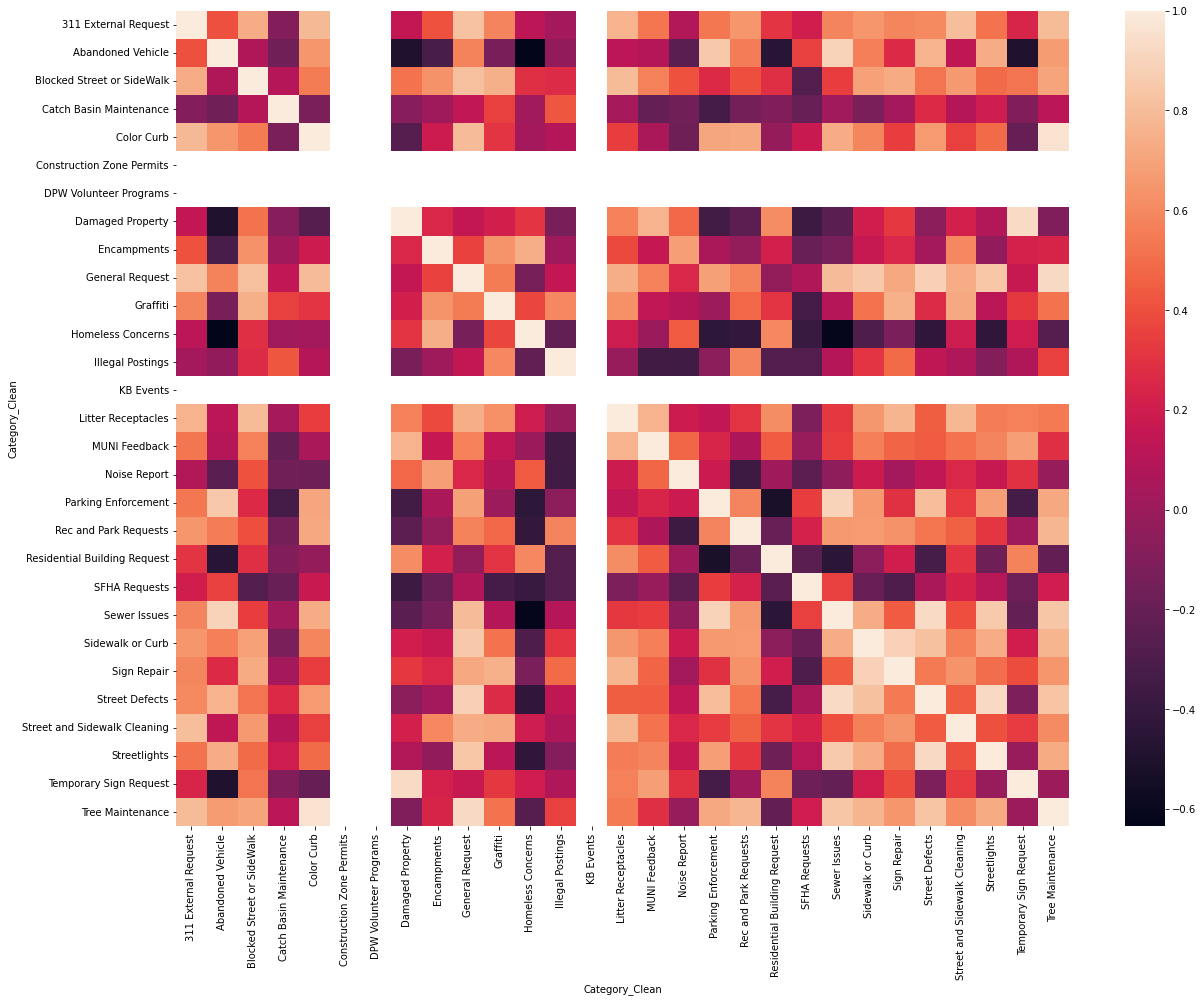

In [164]:
#Let's look at this in a correlation matrix
from matplotlib import pyplot as plt
corr = pivot.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [165]:
c = pivot.corr().abs()
c

Category_Clean,311 External Request,Abandoned Vehicle,Blocked Street or SideWalk,Catch Basin Maintenance,Color Curb,Construction Zone Permits,DPW Volunteer Programs,Damaged Property,Encampments,General Request,...,Residential Building Request,SFHA Requests,Sewer Issues,Sidewalk or Curb,Sign Repair,Street Defects,Street and Sidewalk Cleaning,Streetlights,Temporary Sign Request,Tree Maintenance
Category_Clean,,,,,,,,,,,,,,,,,,,,,
311 External Request,1.000000,0.406093,0.734731,0.087595,0.785589,NaN,NaN,0.146256,0.407313,0.823052,...,0.304686,0.202111,0.582110,0.643488,0.587586,0.600256,0.807343,0.516222,0.241303,0.793884
Abandoned Vehicle,0.406093,1.000000,0.068838,0.160994,0.647201,NaN,NaN,0.498543,0.319371,0.576956,...,0.456015,0.353900,0.897180,0.559791,0.265760,0.761561,0.135868,0.732636,0.497297,0.672892
Blocked Street or SideWalk,0.734731,0.068838,1.000000,0.092333,0.552530,NaN,NaN,0.515642,0.635050,0.809493,...,0.285218,0.285843,0.338287,0.689961,0.727472,0.523867,0.660431,0.489636,0.527165,0.704037
Catch Basin Maintenance,0.087595,0.160994,0.092333,1.000000,0.120365,NaN,NaN,0.072754,0.006770,0.141769,...,0.101314,0.199207,0.020918,0.125845,0.025070,0.263675,0.094094,0.192295,0.101741,0.117771
Color Curb,0.785589,0.647201,0.552530,0.120365,1.000000,NaN,NaN,0.269326,0.186021,0.797945,...,0.027106,0.172142,0.734736,0.589035,0.338854,0.664974,0.353152,0.489640,0.204633,0.961415
Construction Zone Permits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPW Volunteer Programs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damaged Property,0.146256,0.498543,0.515642,0.072754,0.269326,NaN,NaN,1.000000,0.249732,0.149232,...,0.614540,0.378663,0.250773,0.204172,0.318808,0.066850,0.215990,0.082386,0.925610,0.110859
Encampments,0.407313,0.319371,0.635050,0.006770,0.186021,NaN,NaN,0.249732,1.000000,0.361545,...,0.219446,0.198941,0.140378,0.169433,0.250692,0.032923,0.591781,0.039868,0.225807,0.239510


In [166]:
# I want to find cliques or groups of issues that are usally associated with each other
s = c.unstack()
s

Category_Clean        Category_Clean              
311 External Request  311 External Request            1.000000
                      Abandoned Vehicle               0.406093
                      Blocked Street or SideWalk      0.734731
                      Catch Basin Maintenance         0.087595
                      Color Curb                      0.785589
                                                        ...   
Tree Maintenance      Street Defects                  0.831046
                      Street and Sidewalk Cleaning    0.610355
                      Streetlights                    0.725682
                      Temporary Sign Request          0.003583
                      Tree Maintenance                1.000000
Length: 841, dtype: float64

In [167]:
so = s.sort_values(kind= "quicksort", ascending = False)


In [168]:
so = so.to_frame()
so = so.rename_axis(['Category_Clean_1', 'Category_Clean_2']).reset_index()
#so = so.rename(columns = {so.columns[2]: "correlation"},inplace = True)
so


,Category_Clean_1,Category_Clean_2,0
0,311 External Request,311 External Request,1.0
1,Noise Report,Noise Report,1.0
2,Catch Basin Maintenance,Catch Basin Maintenance,1.0
3,Color Curb,Color Curb,1.0
4,Damaged Property,Damaged Property,1.0
...,...,...,...
836,Temporary Sign Request,DPW Volunteer Programs,NaN
837,Temporary Sign Request,KB Events,NaN
838,Tree Maintenance,Construction Zone Permits,NaN
839,Tree Maintenance,DPW Volunteer Programs,NaN


In [169]:
so1 = so.copy()

In [170]:
so1 = so1.rename(columns = {so1.columns[2]: "corr"})
so1

,Category_Clean_1,Category_Clean_2,corr
0,311 External Request,311 External Request,1.0
1,Noise Report,Noise Report,1.0
2,Catch Basin Maintenance,Catch Basin Maintenance,1.0
3,Color Curb,Color Curb,1.0
4,Damaged Property,Damaged Property,1.0
...,...,...,...
836,Temporary Sign Request,DPW Volunteer Programs,NaN
837,Temporary Sign Request,KB Events,NaN
838,Tree Maintenance,Construction Zone Permits,NaN
839,Tree Maintenance,DPW Volunteer Programs,NaN


In [171]:
#remove ones and nans
df_corr = so1.dropna()
df_corr = df_corr[df_corr['corr'] > 0.7]

In [172]:
#Prepare data to see issues that tend to happen together
df_corr = df_corr[['Category_Clean_1', 'Category_Clean_2']]

In [173]:
df_corr

,Category_Clean_1,Category_Clean_2
0,311 External Request,311 External Request
1,Noise Report,Noise Report
2,Catch Basin Maintenance,Catch Basin Maintenance
3,Color Curb,Color Curb
4,Damaged Property,Damaged Property
...,...,...
123,Graffiti,Street and Sidewalk Cleaning
124,Color Curb,Parking Enforcement
125,Parking Enforcement,Color Curb
126,Blocked Street or SideWalk,Tree Maintenance


In [174]:
df_corr = df_corr.to_numpy()
df_corr

array([['311 External Request', '311 External Request'],
       ['Noise Report', 'Noise Report'],
       ['Catch Basin Maintenance', 'Catch Basin Maintenance'],
       ['Color Curb', 'Color Curb'],
       ['Damaged Property', 'Damaged Property'],
       ['Encampments', 'Encampments'],
       ['General Request', 'General Request'],
       ['Graffiti', 'Graffiti'],
       ['Homeless Concerns', 'Homeless Concerns'],
       ['Illegal Postings', 'Illegal Postings'],
       ['Litter Receptacles', 'Litter Receptacles'],
       ['MUNI Feedback', 'MUNI Feedback'],
       ['Parking Enforcement', 'Parking Enforcement'],
       ['Abandoned Vehicle', 'Abandoned Vehicle'],
       ['Rec and Park Requests', 'Rec and Park Requests'],
       ['Residential Building Request', 'Residential Building Request'],
       ['SFHA Requests', 'SFHA Requests'],
       ['Sewer Issues', 'Sewer Issues'],
       ['Sidewalk or Curb', 'Sidewalk or Curb'],
       ['Sign Repair', 'Sign Repair'],
       ['Street Defects', 'S

In [175]:
import networkx as nx
g = nx.from_edgelist(df_corr)
ls_cliques = []
for clique in nx.algorithms.find_cliques(g):
    ls_cliques.append(clique)

In [176]:
ls_cliques

[['Abandoned Vehicle',
  'Street Defects',
  'Sewer Issues',
  'Parking Enforcement'],
 ['Abandoned Vehicle', 'Street Defects', 'Sewer Issues', 'Streetlights'],
 ['Illegal Postings'],
 ['Catch Basin Maintenance'],
 ['Noise Report'],
 ['Temporary Sign Request', 'Damaged Property'],
 ['Graffiti', 'Sign Repair', 'Blocked Street or SideWalk'],
 ['Graffiti', 'Street and Sidewalk Cleaning'],
 ['SFHA Requests'],
 ['Residential Building Request'],
 ['Homeless Concerns', 'Encampments'],
 ['Rec and Park Requests', 'Tree Maintenance', 'Color Curb'],
 ['General Request', 'Sign Repair', 'Sidewalk or Curb'],
 ['General Request',
  'Sign Repair',
  'Litter Receptacles',
  'Blocked Street or SideWalk'],
 ['General Request',
  'Street and Sidewalk Cleaning',
  '311 External Request',
  'Litter Receptacles'],
 ['General Request', 'Tree Maintenance', '311 External Request', 'Color Curb'],
 ['General Request',
  'Tree Maintenance',
  '311 External Request',
  'Blocked Street or SideWalk'],
 ['General Requ